# This notebook contains regression using Neural Network

In [6]:
from data_loader import DataLoader
from neuralnetwork import create_nn_regressor
from configurations import args
from base_regressor_plot import BaseRegressorPlot
import matplotlib.pyplot as plt
from tensorflow.keras import layers
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


import warnings
warnings.filterwarnings('ignore')


## Notes
Reading data the cleaning and encoding is in DataLoader module.

The neural_network.py has the details for the creating Neural Network.

## Read Data
Read split ready to use data

In [7]:
data_loader = DataLoader(args)

In [8]:
# # Analysis showed these features are impactful
# categorical_features = ['MSSubClass', 'MSZoning', 'LotShape',
#                         'LandContour', 'LotConfig', 'LandSlope', 
#                         'Neighborhood', 'Condition1', 'Condition2',
#                         'BldgType', 'HouseStyle', 'RoofStyle', 'Heating',
#                         'HeatingQC']
# nominal_features = ['PoolArea', 'YearRemodAdd', 
#                     'MasVnrArea', 'YearBuilt', 'KitchenAbvGr',
#                      'GrLivArea', 'OverallQual',
#                       'BedroomAbvGr', 'TotalBsmtSF', 'LotArea', 
#                       'OverallCond',]

In [9]:
# FS Analysis showed these features are impactful
categorical_features = ['KitchenQual', 'Exterior2nd', 'ExterQual',
                        'Neighborhood', 'HeatingQC', 'Foundation', 'MSSubClass']
nominal_features = ['LotArea', 'TotalBsmtSF', 'YearRemodAdd', 'GarageArea', 'FullBath', 'GarageCars',
                    'GrLivArea', 'YearBuilt', 'OverallQual', 'Fireplaces', 'TotRmsAbvGrd', '1stFlrSF', '2ndFlrSF', 'BsmtFinSF1']


## Model

Before dropping NA (1456, 22)
After dropping NA (1456, 22), dropped 0
Before dropping NA (1456, 22)
removing: Other 1
removing: CBlock 1
removing: Po 1
Before dropping NA (1453, 22), dropped 3
Complied new model
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 128)               11264     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 19,585
Trainable params: 19,585
Non-trainable params: 0
_________________________________________________________________
Training................................................................................................................................................................

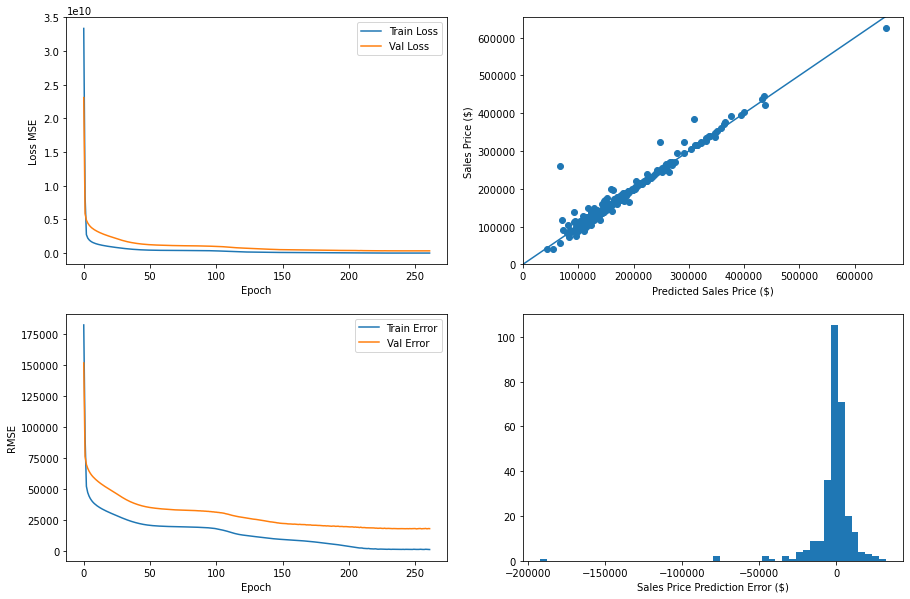

In [10]:
def analyze_neuralnet_regression():
    ''''This method load data and runs the neural net taring and prediction
    
    '''
    # Get clean normized data and split it to train_val and test
    X_train_val, X_test, y_train_val, y_test = data_loader.prep_verify_data_for_nn(
        categorical_features, nominal_features)
    # split the train_val to train and val
    X_train, X_val, y_train, y_val = train_test_split(
        X_train_val, y_train_val, test_size=0.15, random_state=1)
    
    regressor = create_nn_regressor(
        X_train, X_val, y_val, epochs=args.num_epochs)
    # model summary 
    regressor.model.summary()
    regressor.fit(X_train, y_train)
    # We use test just for test
    predicted = regressor.get_predicted(X_test)
    print("\n")

    # plot dignostics
    _, axes = plt.subplots(2, 2, figsize=(15, 10))
    BaseRegressorPlot.plot_history_loss(
        axes[0][0], regressor,  inlcule_val_loss=True)
    BaseRegressorPlot.plot_predicted_vs_actual(axes[0][1], predicted, y_test)
    BaseRegressorPlot.plot_rmse(axes[1][0], regressor, inlcule_val_loss=True)
    BaseRegressorPlot.plot_error_hist(axes[1][1], predicted, y_test)
    # Printe RMSE
    print(f'RMSE for test set: {mean_squared_error(y_test, regressor.predict(X_test), squared=False)}')
    
    return regressor


nn_regressor = analyze_neuralnet_regression()


# Conclusion

The number of epochs was set for 1000 but we also had early stop. The tranining loss chart shows that the training stopped much earlier.
The loss function shows that validation and training loss are going down so the process is converging. 
The result shows the the RSME for test is about `14634.35`